# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [36]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab 

# colors
green = '#7fc97f'
purple = '#beaed4'
organe = '#fdc086'
yellow = '#ffff99'
blue = '#386cb0'

df = pd.read_csv('data/human_body_temperature.csv')

In [16]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Check Normality

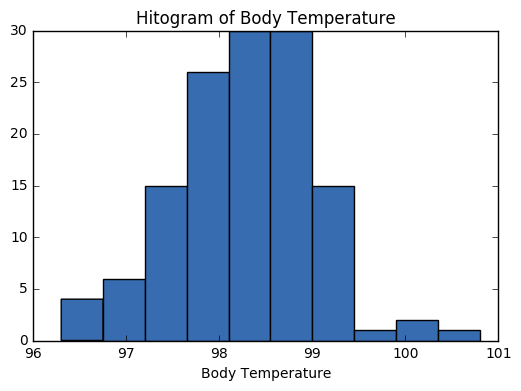

In [33]:
# histogram 
plt.hist(df.temperature, color = blue)
plt.xlabel("Body Temperature")
plt.title("Hitogram of Body Temperature")
plt.show()
plt.clf()

According to the histogram we can see that the distribution is very normal. We can also further test this using qqplot. 

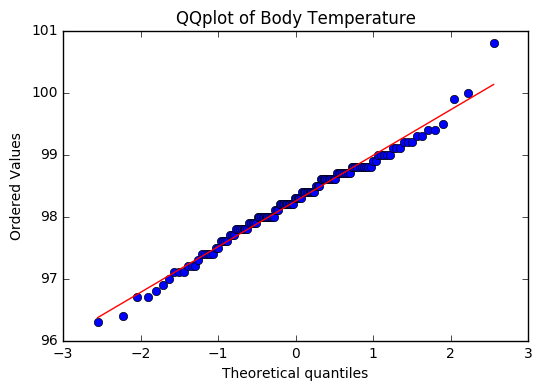

In [40]:
# use qqplot to check normality 
stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.title("QQplot of Body Temperature")
pylab.show()

According to the qqplot, it is evident that the distribution is very normal. 

### 2. Is the sample size large? Are the observations independent?

In [47]:
# test sample size
len(df.temperature) 

130

Since the sample = 130 > 30, we conclude that it is large enough. 

### 3. Is the true population mean really 98.6 degrees F?

$H_0:$ The true population mean is NOT 98.6 degrees F. ($\mu\neq98.6$)

We will use 2-tail test because the null hypothesis is "NOT equal" instead of "great than"/"smaller than". 

Since the sample size is 130, a large sample size. Z and t will both work. 

In [51]:
sample_mean = df.temperature.mean()
sample_std = df.temperature.std()
[sample_mean, sample_std]

[98.24923076923078, 0.7331831580389454]

In [62]:
# Z test 
Z_CI = [sample_mean - sample_std*1.96, sample_mean + sample_std*1.96]
Z_CI

[96.81219177947445, 99.68626975898711]

In [60]:
# t test
t_CI = [sample_mean - sample_std*1.984, sample_mean + sample_std*1.984]
t_CI

[96.79459538368151, 99.70386615478004]

From the 2 CI above, we can see that both CI include the value 98.6 and therefore we fail to reject the null hypothesis and conclude that 98.6 is the true poulation mean. 

In addition, the CI of t test is slightly wider than that of Z test. 

### 4. At what temperature should we consider someone's temperature to be "abnormal"?

If we use the CI of the Z test, for temperature < 96.81 or > 99.69 should be consider abnormal. 

### 5. Is there a significant difference between males and females in normal temperature?

We can test this using: 
* Overlap 
* Probability of superiority
* Pooled variance 

In [71]:
female_temp = df.temperature[df.gender == "F"]
male_temp =  df.temperature[df.gender == "M"]
female_mean = female_temp.mean()
male_mean = male_temp.mean()
female_var = female_temp.var()
male_var = male_temp.var()
n1 = len(female_temp)
n2 = len(male_temp)
print("Female: (mean, var, len)", female_mean, female_var, n1)
print("Male: (mean, var, len)", male_mean, male_var, n2)

Female: (mean, var, len) 98.39384615384613 0.5527740384615375 65
Male: (mean, var, len) 98.1046153846154 0.488259615384615 65


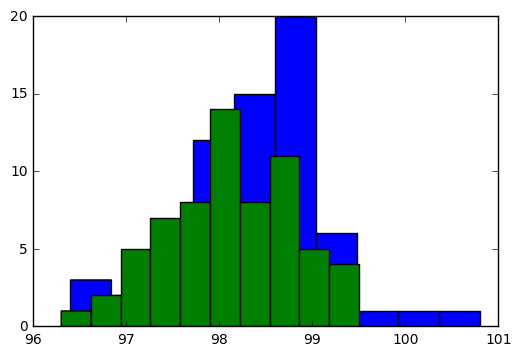

In [86]:
bins = np.linspace(97, 99, 1000)
plt.hist(female_temp)
plt.hist(male_temp)
plt.show()

#### Overlap

In [79]:
threshold = (female_mean * n1 + male_mean * n2)/(n1 + n2) # need need to weight though
threshold

98.24923076923076

In [88]:
overlap_rate = sum(female_temp < threshold)/n1 + sum(male_temp > threshold)/n2
overlap_rate
misclassification_rate = overlap_rate / 2
misclassification_rate

0.42307692307692313

The misclassification rate is really high, which mean there is not much difference between 2 distribution. 

#### Probability of Superiority 

In [96]:
new_female_temp = np.random.choice(female_temp, n1, replace=True)
new_male_temp = np.random.choice(male_temp, n2, replace=True)
sum(x > y for x,y in zip(new_female_temp, new_male_temp))/n1

0.53846153846153844

Since the probability of superiority is not really high (close to 90%), we cannot tell there is a difference between body temperature of female and male. However, we still need pooled variance to prove rigorously. 

#### Pooled Variance
$H_0:$ The difference between 2 distribution is 0. 

In [100]:
diff = female_mean - male_mean
pooled_var = (n1 * female_var + n2 * male_var)/(n1 + n2)
pvalue = diff/np.sqrt(pooled_var)
pvalue

0.40089173785982207

Since 0.40 is too big for the default significant level 0.05, we conclude that there is a difference between the body temperature of female and male. In this case, since female has a higher averge body temperature. We conclude that female in general have higher body temperature. 